In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Este notebook se centrará en el EDA para este MVP
#Los datasets "credits.csv" y "movies_dataset.csv" ya han sido limpiados y unidos para proposito de este MVP
#A su vez se han limpiado columnas que se han considerado innecesarias para este MVP y para mejorar el rendimiento del modelo (Columnas fuera de las que ya se requerían eliminar)
#Dichas columnas son:
#Columnas visuales que no serán utiles para el desarrollo de funciones: "profile_path", columna desanidada de las originales columnas "crew" y "cast"
#Id's secundarias que tampoco serán utiles para el desarrollo de las funciones del MVP: "cast_id", "credit_id" y "id" (De las originales columnas "crew y "cast")
#La razón de no considerar estos datos útiles es dado a los requerimientos y objetivos de un MVP, aún así los datos se conservarán para projectos formales.

#Comenzamos cargando el dataset
df = pd.read_csv('C:/Users/march/Downloads/Movies/dataset_completo_necesario.csv')

In [7]:
#Chequeo del dataset
df.head(5)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,genre_id,company_id,act_name,character,act_gender,act_order,crew_name,crew_gender,job,department
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,"16, 35, 10751",3,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","Director, Screenplay, Screenplay, Screenplay, ...","Directing, Writing, Writing, Writing, Writing,..."
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"12, 14, 10751","559, 2550, 10201","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","Larry J. Franco, Jonathan Hensleigh, James Hor...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","Executive Producer, Screenplay, Original Music...","Production, Writing, Sound, Directing, Editing..."
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"10749, 35","6194, 19464","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Max Goldman, John Gustafson, Ariel Gustafson, ...","2, 2, 1, 1, 1, 2, 2","0, 1, 2, 3, 4, 5, 6","Howard Deutch, Mark Steven Johnson, Mark Steve...","2, 2, 2, 2","Director, Characters, Writer, Sound Recordist","Directing, Writing, Writing, Crew"
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"35, 18, 10749",306,"Whitney Houston, Angela Bassett, Loretta Devin...","Robin Stokes, Marvin King, Kenneth Dawkins, Jo...","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","Director, Screenplay, Producer, Producer, Prod...","Directing, Writing, Production, Production, Pr..."
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,35,"5842, 9195","Steve Martin, Diane Keaton, Martin Short, Kimb...","George Banks, Nina Banks, Franck Eggelhoffer, ...","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","2, 2, 1, 1, 2, 2, 2","Original Music Composer, Director of Photograp...","Sound, Camera, Writing, Production, Writing, D..."


In [10]:
#Empezamos chequeando los valores nulos
#Tener en cuenta que no hubieron mas transformaciones a los datasets fuera de las requeridas y de las columnas explicadas al principio de este notebook


#Vemos que hay valores nulos en varias de estas columnas, principalemente la de "collection" y "collection_id", esto se puede explicar dado a que no todas las peliculas pertenecen a sagas o tienen secuelas
#Cerca de los 25k NULOS tenemos la columna "tagline", que nos muestra frases iconicas de algún personaje de la pelicula
#Se pueden explicar los NULOS de "tagline" y de muchas columnas más dado a un deficit de datos debido a la popularidad de las mismas, o mas bien la falta de ella.
print('\
Valores nulos por columna:')
print(df.isnull().sum())

Valores nulos por columna:
budget                    0
id                        0
original_language        11
overview                941
popularity                0
release_date              0
revenue                   0
runtime                 246
status                   80
tagline               25026
title                     0
vote_average              0
vote_count                0
collection            41061
genre                  2384
production_company    11875
production_country     6220
language               3897
release_year              0
return                    0
collection_id         40954
genre_id               2384
company_id            11817
act_name               2364
character              2512
act_gender             2354
act_order              2354
crew_name               756
crew_gender             723
job                     723
department              723
dtype: int64


In [14]:
#Revisión de valores duplicados
duplicados = df[df.duplicated()]

print(duplicados)

#Resumen
resumen_duplicados = duplicados.describe()

print(resumen_duplicados)

#Hay 82 filas duplicadas

       budget      id original_language  \
677         0  105045                de   
678         0  105045                de   
679         0  105045                de   
954         4   22649                en   
956         4   22649                en   
...       ...     ...               ...   
25950       0    8767                fr   
25952       0   43629                xx   
25954       0  187156                en   
33228  980000  298721                th   
33229  980000  298721                th   

                                                overview  popularity  \
677    East-Berlin, 1961, shortly after the erection ...    0.122178   
678    East-Berlin, 1961, shortly after the erection ...    0.122178   
679    East-Berlin, 1961, shortly after the erection ...    0.122178   
954    British nurse Catherine Barkley (Helen Hayes) ...    1.914697   
956    British nurse Catherine Barkley (Helen Hayes) ...    2.411191   
...                                                

In [16]:
#Resumen estadístico
print('\
Resumen estadístico:')
print(df.describe())

#Podemos hacer unas cuantas observaciones gracias a estos datos
#El "budget" o presupuesto de las peliculas varía entre rangos de 1 millon hasta 380 millones de dólares, por tanto hay mucha variabilidad, además la media de los presupuestos está en los 37 millones
#En cuanto al "revenue" o recaudación vemos que puede llegar hasta los 2 mil millones de dólares a pesar que la media está en 82 millones
#El "vote_average" o puntuación media está en 6.1, aunque con un rango que varía de 1.9 hasta 9.3. La gran mayoría de peliculas tienen una puntuación de 5 a 7
#La media de la popularidad es de 21.9, con un rango que va desde 0 hasta 547
#La popularidad muestra una distribución sesgada, con algunas películas extremadamente populares
#La media de la duración es de aproximadamente 107 minutos
#La duración de las películas varía desde 0 (posiblemente datos faltantes) hasta 900 minutos

#Conclusiones
#Variabilidad: Tanto el presupuesto como los ingresos muestran una gran variabilidad, lo que sugiere que hay películas con presupuestos e ingresos extremadamente altos y bajos
#Distribución Sesgada: La popularidad y los ingresos muestran distribuciones sesgadas, con algunas películas que son extremadamente populares o exitosas en términos de ingresos
#Datos Faltantes: La duración de 0 minutos en "runtime", el presupuesto de 0 en "budget" y entre otros valores en 0 sugiere que hay datos faltantes o incorrectos en la columna de duración, de nuevo, probablemente debido a la poca popularidad de estas peliculas lo que hace que estos datos no fuesen accesibles a la hora de ir llenando este dataset

Resumen estadístico:
             budget             id    popularity       revenue       runtime  \
count  4.545100e+04   45451.000000  45451.000000  4.545100e+04  45205.000000   
mean   4.231294e+06  107984.599745      2.926887  1.121930e+07     94.181905   
std    1.742942e+07  112111.336735      6.006458  6.433984e+07     38.329504   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26367.500000      0.389095  0.000000e+00     85.000000   
50%    0.000000e+00   59871.000000      1.131386  0.000000e+00     95.000000   
75%    0.000000e+00  156327.500000      3.694370  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  release_year        return  collection_id  
count  45451.000000  45451.000000  45451.000000  4.545100e+04    4497.000000  
mean       5.624085    109.989703   1991.882027  6.589542e+02  183889.401379  
std        1.915424  

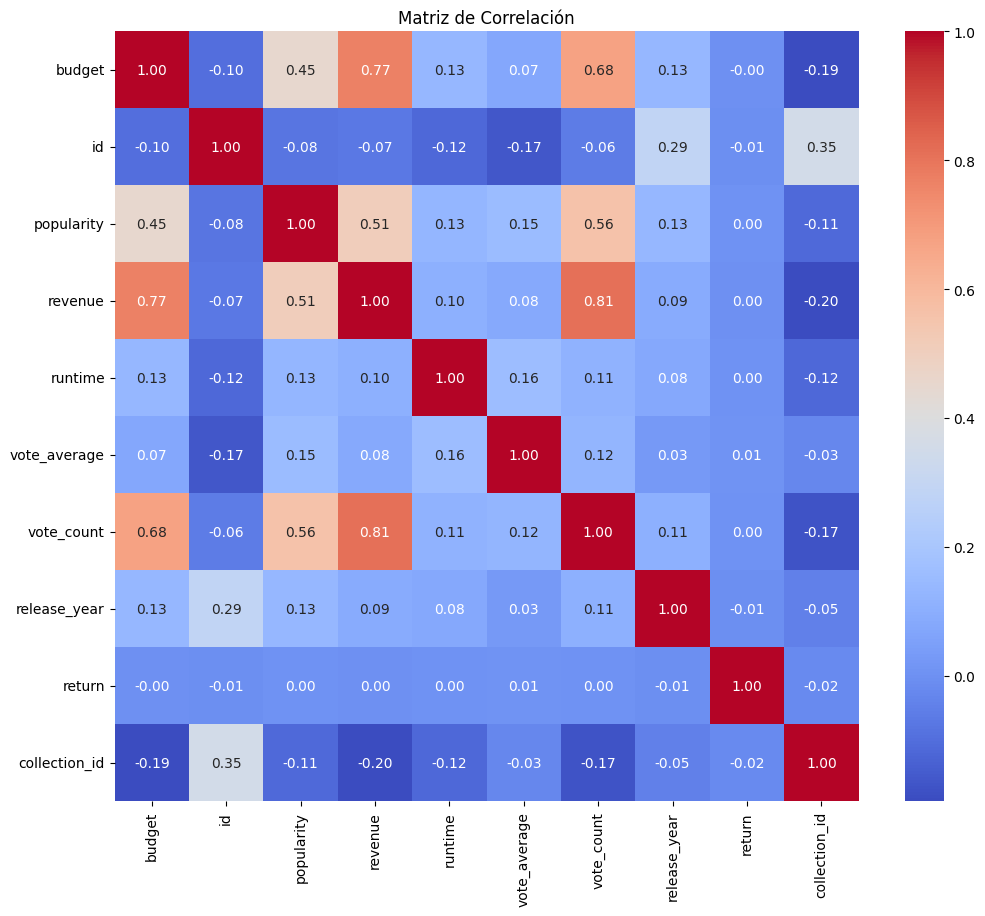

In [19]:
#Continuamos con el analisis de correlaciones y multivariado
cols_numericas = df.select_dtypes(include=[np.number]).columns

matriz_de_correlación = df[cols_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_de_correlación, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [20]:
#Este gráfico de calor muestra la matriz de correlación entre las variables numéricas del dataset. Las correlaciones varían de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta), con 0 indicando ninguna correlación
#Observamos la fuerte relación entre las variables de "vote_count" y "revenue", cosa que puede resultar muy útil en el desarrollo de la API
#Por lo demás podemos encontrar una correlación entre el "presupuesto" y la "recaudación", cosa que ya se sabía con la creación de "return"

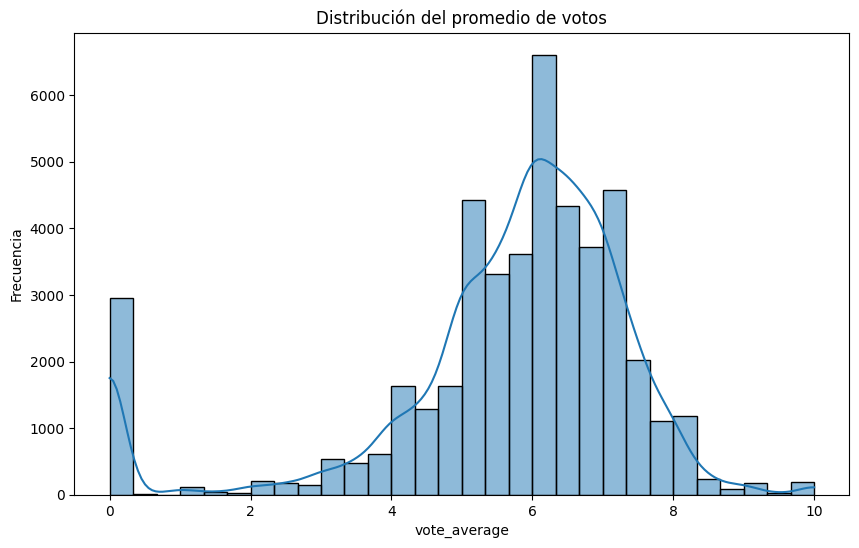

In [25]:
# Aquí podemos observar a mas detalle la variable de "vote_average" en un histograma, consideré está la mas importante de visualizar ya que será de las más importantes en el desarrollo del modelo de recomendaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True)
plt.title('Distribución del promedio de votos')
plt.xlabel('vote_average')
plt.ylabel('Frecuencia')
plt.show()

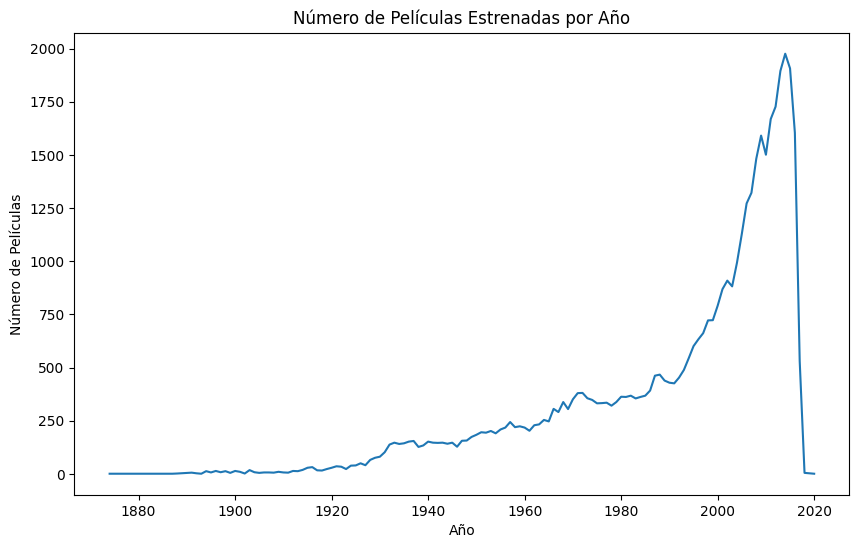

In [26]:
#Esta gráfica muestra la cantidad de peliculas estrenadas por año, lo cuál me será útil para tratar de encontrar la relación entre popularidad y año de salida en la siguiente y última tabla

df['release_year'] = pd.to_datetime(df['release_date']).dt.year
plt.figure(figsize=(10, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Número de Películas Estrenadas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()

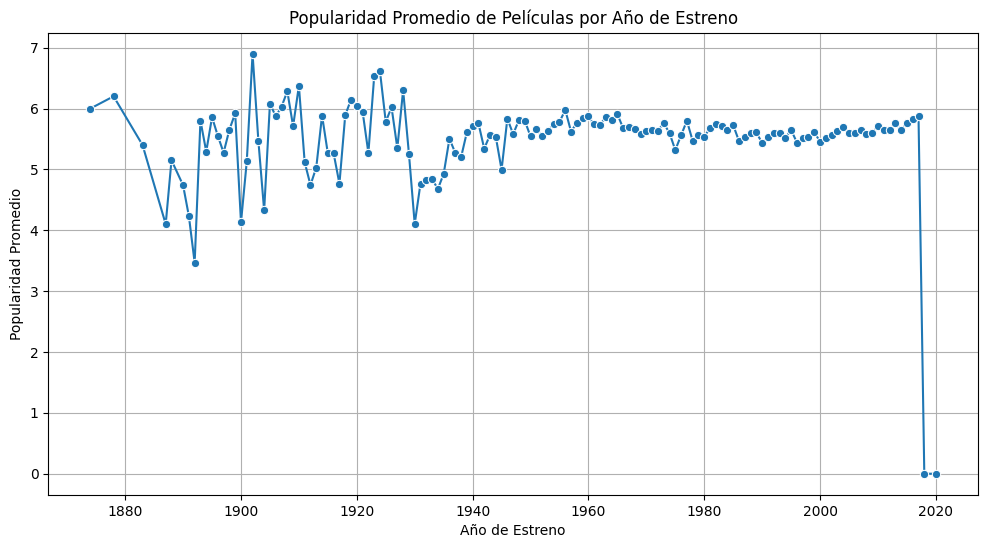

In [27]:
#Se puede ver que el año de estreno no es intrinseco a la popularidad de la pelicula, quizá se deba a las fácilidades de calificación que se fueron desarrollando a mediados del siglo XX, por tanto las calificaciones no están disparadas positivamente o negativamente en ese punto

popularity_by_year = df.groupby('release_year')['vote_average'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_by_year, x='release_year', y='vote_average', marker='o')
plt.title('Popularidad Promedio de Películas por Año de Estreno')
plt.xlabel('Año de Estreno')
plt.ylabel('Popularidad Promedio')
plt.grid(True)
plt.show()

#Esto finaliza mi EDA que se centro en el analisis de popularidad y como esta columna me puede ayudar para el desarrollo del modelo de recomendaciones y demás funciones